In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split

In [2]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
train_df["location"].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [7]:
train_df["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

<AxesSubplot: >

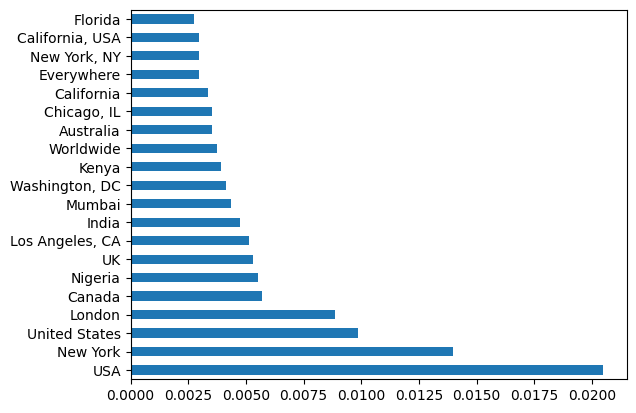

In [8]:
train_df["location"].value_counts(normalize=True).head(20).plot(kind="barh")

In [9]:
train_df["keyword"].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [10]:
train_df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

<AxesSubplot: >

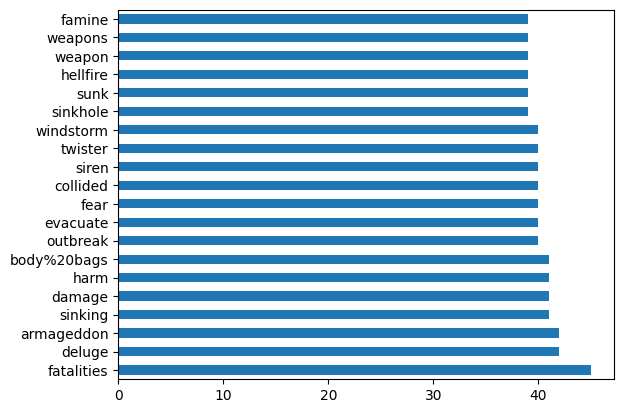

In [11]:
train_df["keyword"].value_counts().head(20).plot(kind="barh")

([], [])

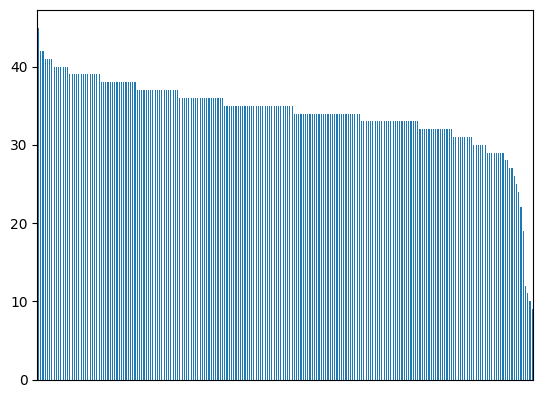

In [12]:
train_df["keyword"].value_counts().plot(kind="bar")
plt.xticks([])

In [13]:
train_df["target"].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

<AxesSubplot: >

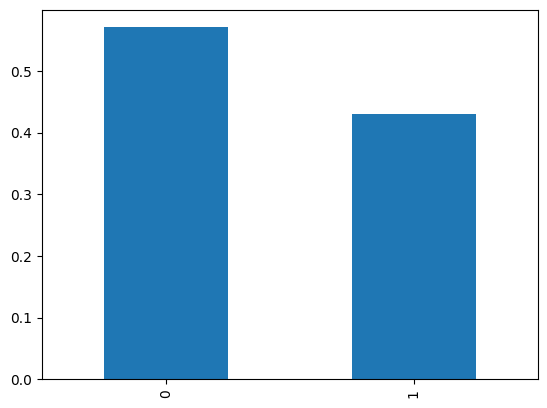

In [14]:
train_df["target"].value_counts(normalize=True).plot(kind="bar")

In [15]:
train_df["text"].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [16]:
#checking for the maximum lenght of the tweet in a given data
def lenght(a):
    return len(a)
len_max = 0
idx = 0
j = 0
for i in train_df["text"]:
    if lenght(i) > len_max:
        len_max = lenght(i)
        idx = i
        max = j
    j += 1
print(len_max)
print(i)
print(max)
train_df["text"][max]


157
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d
1270


"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

In [17]:
train_df["target"][1270]

0

In [18]:
for text in train_df["text"].head(20):
    print(text, len(text))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 69
Forest fire near La Ronge Sask. Canada 38
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 133
13,000 people receive #wildfires evacuation orders in California  65
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  88
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 110
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas 95
I'm on top of the hill and I can see a fire in the woods... 59
There's an emergency evacuation happening now in the building across the street 79
I'm afraid that the tornado is coming to our area... 52
Three people died from the heat wave so far 43
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #fl

Text(0.5, 0, 'lenght')

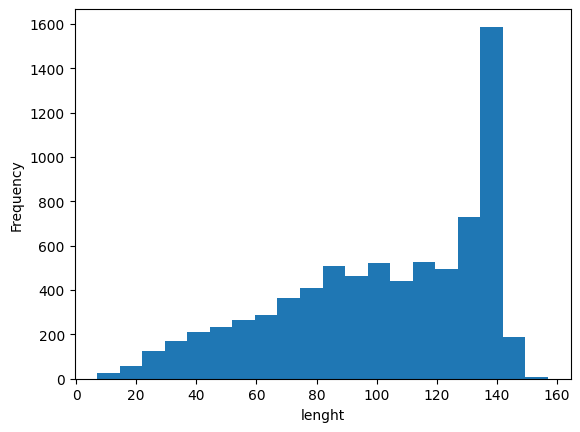

In [19]:
train_df["text"].str.len().plot(kind="hist", bins = 20)
plt.xlabel("lenght")

Text(0.5, 0, 'Length of the text')

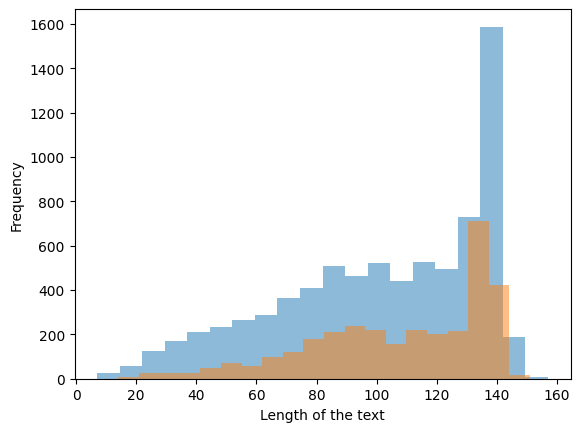

In [20]:
train_df["text"].str.len().plot(kind="hist", bins = 20, alpha = 0.5, label = "All")
train_df[train_df["target"] == 1]["text"].str.len().plot(kind = "hist", bins = 20, alpha = 0.5, label = "Disaster")
plt.xlabel("Length of the text")

[Text(0, 0, 'Not Disaster'), Text(1, 0, 'Disaster')]

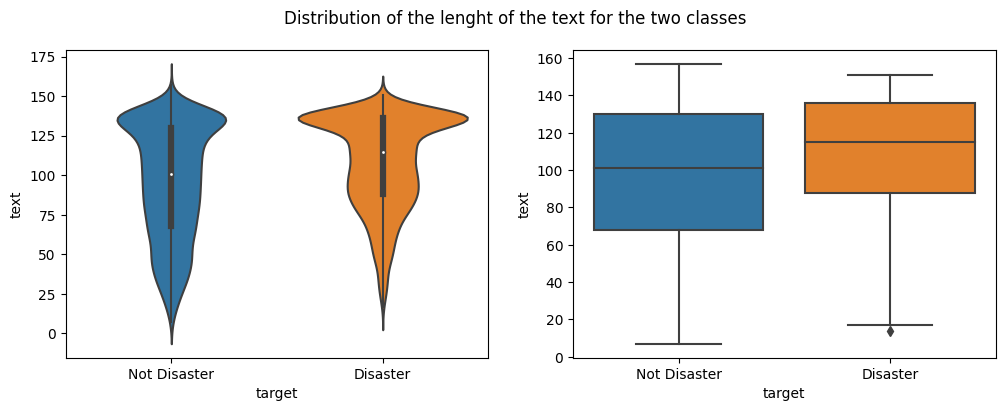

In [21]:
fig, ax = plt.subplots(1,2, figsize =(12,4))
plt.suptitle("Distribution of the lenght of the text for the two classes")
sns.violinplot(x = train_df["target"], y = train_df["text"].str.len(), ax = ax[0])
sns.boxplot(x=train_df['target'], y = train_df['text'].str.len(),ax = ax[1])
ax[0].set_xticklabels(['Not Disaster', 'Disaster'])
ax[1].set_xticklabels(['Not Disaster', 'Disaster'])

In [22]:
import re
def find_non_alphanumeric(text):
    return re.findall(r"[^a-zA-Z0-9 ]", text)

# Find all the non alphanumeric characters in the text
train_df['text'].apply(find_non_alphanumeric).head(20)

0                       [#]
1                       [.]
2                 [', ', .]
3                    [,, #]
4                    [#, #]
5     [#, =, >, ., -, #, #]
6                 [#, #, ,]
7              [', ., ., .]
8                       [']
9              [', ., ., .]
10                       []
11                   [-, #]
12    [#, #, #, #, #, ., ']
13                   [#, #]
14                      [#]
15                   [', ?]
16                       []
17                       []
18                       []
19       [!, !, !, !, !, !]
Name: text, dtype: object

In [23]:
non_alphanumeric_characters = set()
for text in train_df['text']:
    non_alphanumeric_characters.update(find_non_alphanumeric(text))

non_alphanumeric_characters

{'\n',
 '\r',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\x89',
 '\x9d',
 '¡',
 '¢',
 '£',
 '¤',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '´',
 '¼',
 'Â',
 'Ç',
 'È',
 'Ê',
 'Ì',
 'Ï',
 'Ñ',
 'Ò',
 'Ó',
 'Û',
 'â',
 'ã',
 'å',
 '÷',
 'ü'}

In [24]:
print(f"numbeer of different Alpha-numeric character {len(non_alphanumeric_characters)}")


numbeer of different Alpha-numeric character 60


Text(0.5, 0, 'Number of occurences')

) missing from current font.venvs\vraj_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
c:\Users\vrajp\python_stuff\venvs\vraj_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
) missing from current font.venvs\vraj_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vrajp\python_stuff\venvs\vraj_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


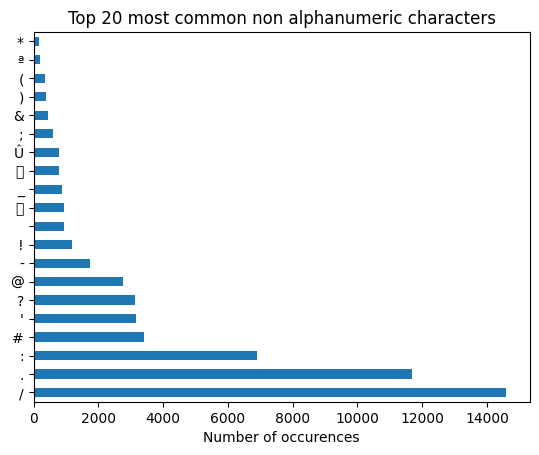

In [25]:
train_df['text'].apply(find_non_alphanumeric).explode().value_counts().head(20).plot(kind = "barh")
plt.title("Top 20 most common non alphanumeric characters")
plt.xlabel("Number of occurences")

In [26]:
train_df[train_df['text'].str.contains("@")]['text'].head(20)

31     @bbcmtd Wholesale Markets ablaze http://t.co/l...
36     @PhDSquares #mufc they've built so much hype a...
43          SOOOO PUMPED FOR ABLAZE ???? @southridgelife
54     Noches El-Bestia '@Alexis_Sanchez: happy to se...
57     Set our hearts ablaze and every city was a gif...
63     @Navista7 Steve these fires out here are somet...
65     @nxwestmidlands huge fire at Wholesale markets...
66     @ablaze what time does your talk go until? I d...
75     RT @SleepJunkies: Sleeping pills double your r...
92     8/6/2015@2:09 PM: TRAFFIC ACCIDENT NO INJURY a...
97     #BREAKING: there was a deadly motorcycle car a...
98     @flowri were you marinading it or was it an ac...
100    .@NorwayMFA #Bahrain police had previously die...
102    @afterShock_DeLo scuf ps live and the game... cya
104    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...
106    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...
108    @afterShock_DeLo im speaking from someone that...
114    320 [IR] ICEMOON [AFTERS

In [27]:
train_df[train_df['text'].str.contains("/")]['text'].head(20)

31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
40    Check these out: http://t.co/rOI2NSmEJJ http:/...
44    I wanted to set Chicago ablaze with my preachi...
45    I gained 3 followers in the last week. You? Kn...
46    How the West was burned: Thousands of wildfire...
48    Check these out: http://t.co/rOI2NSmEJJ http:/...
50    Deputies: Man shot before Brighton home set ab...
51    Man wife get six years jail for setting ablaze...
52    SANTA CRUZ ÛÓ Head of the St Elizabeth Police...
53    Police: Arsonist Deliberately Set Black Church...
54    Noches El-Bestia '@Alexis_Sanchez: happy to se...
55    #Kurds trampling on Turkmen flag later set it ...
56    TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSI

In [28]:
train_df.isna().sum(), test_df.isna().sum()

(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id             0
 keyword       26
 location    1105
 text           0
 dtype: int64)

In [29]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
# from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [30]:
from transformers import AutoTokenizer

In [31]:
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", use_fast = False, normalization = True)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [32]:
line = "there is a fire at my place in Montreal"
input_ids = torch.tensor([tokenizer(line, padding="max_length", max_length=64, truncation=True).input_ids])

In [130]:
# output =torch.tensor(tokenizer.encode(line)) 
# print(output)
# print(output.shape)
# output = output.type(torch.DoubleTensor)
# def scale_down(x):
#     y = x
#     a = torch.min(x)
#     b = torch.max(x)
#     for i in range(len(x)):
#         y[i] = (x[i]-a)/(b-a)
            
#     return y
# output_scaled = scale_down(output)
# print(output_scaled)
# embedding = nn.Embedding(20,12)
# output = embedding(torch.tensor([0.000,1.222,9.909,0.000003]))

In [131]:
# # x = torch.tensor([[1.0,2.0,3.0,4.0,5.0],[1.0,2.0,3.0,4.0,5.0]])
# # print(x.shape)
# def scale_down(x):
#     y = x
#     a = torch.min(x)
#     b = torch.max(x)
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             y[i,j] = (x[i,j]-a)/(b-a)
            
#     return y
# # x_scaled_down = scale_down(x)
# # print(x_scaled_down)


In [33]:
output_dict = tokenizer.encode_plus(line, add_special_tokens=True, max_length=90, padding="max_length", return_attention_mask=True, return_tensors="pt")
# print(output_dict.keys)
input_ids = output_dict.input_ids
attention_mask = output_dict.attention_mask
print(output_dict)

{'input_ids': tensor([[    0,    99,    17,    11,   999,    35,    23,   430,    16, 11596,
             2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0,

In [86]:
# print(input_ids.shape)
# attention_mask.shape

In [156]:
x = torch.tensor([[1,2,3],[5,6,7]])
x_dummy = torch.zeros([2,3,2])
print(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x_dummy[i,j,:] = x[i,j]
print(x_dummy)

tensor([[1, 2, 3],
        [5, 6, 7]])
tensor([[[1., 1.],
         [2., 2.],
         [3., 3.]],

        [[5., 5.],
         [6., 6.],
         [7., 7.]]])


In [70]:
input_ids = []
attention_mask = []

tweets = train_df["text"].to_list()
for tweet in tweets:
    output_dict = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=90, padding='max_length', return_attention_mask=True, return_tensors='pt')
    # input_ids = torch.squeeze(output_dict.input_ids)
    # for i in range(len(input_ids)):
        # print(input_ids[i])
        
    # input_ids.append(model_embedding(output_dict.input_ids[:,i]))
    input_ids.append(output_dict.input_ids)
    attention_mask.append(output_dict.attention_mask)
# print(input_ids)
# print(len(input_ids))
input_ids = torch.cat(input_ids, dim = 0)
print(len(input_ids[:,0]))
attention_mask = torch.cat(attention_mask, dim=0)
# input_ids = input_ids.unsqueeze(dim=2)
# input_ids = input_ids[:,:]
# no_features = 256
# dummy = torch.zeros([input_ids.shape[0], input_ids.shape[1],no_features ])
# print(dummy)
print(input_ids.shape)

7613
torch.Size([7613, 90])


In [148]:

# for i in range(input_ids.shape[0]):
#     for j in range(input_ids.shape[1]):
#         dummy[i,j,:] = input_ids[i,j]

# print(dummy)

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [8.3000e+02, 8.3000e+02, 8.3000e+02,  ..., 8.3000e+02,
          8.3000e+02, 8.3000e+02],
         [4.2900e+02, 4.2900e+02, 4.2900e+02,  ..., 4.2900e+02,
          4.2900e+02, 4.2900e+02],
         ...,
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [8.0460e+03, 8.0460e+03, 8.0460e+03,  ..., 8.0460e+03,
          8.0460e+03, 8.0460e+03],
         [9.9900e+02, 9.9900e+02, 9.9900e+02,  ..., 9.9900e+02,
          9.9900e+02, 9.9900e+02],
         ...,
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.000

In [135]:
# embedding = nn.Embedding(90, 256)
# em_dataset = TensorDataset(input_ids)
# em_dataloader = DataLoader(em_dataset, batch_size= 32,shuffle=True)
# for batch, data in enumerate(em_dataloader):
#     print(data[0].size)
#     for i in range(len(input_ids[0].shape)):
#         for j in range(len(input_ids[1].shape)):
#             input_ids[i,j,:] = embedding(data[0]) 


In [56]:
labels = train_df["target"].to_list()
print(len(labels))
labels = torch.tensor(labels)
# print(labels)


7613


In [57]:
# input_ids = dummy
dataset =  TensorDataset(input_ids, labels)

In [58]:

train_size = int(0.85*len(dataset))
val_size = len(dataset) - train_size



In [71]:
train_dataset, val_dataset = random_split(dataset, [train_size,val_size])
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle = True)
# embedding = nn.Embedding(90, 256)
for (batch_id,[input,label])  in enumerate(train_dataloader):
    print(batch_id)
    print(input.shape)
    print(label.shape)

0
torch.Size([32, 90])
torch.Size([32])
1
torch.Size([32, 90])
torch.Size([32])
2
torch.Size([32, 90])
torch.Size([32])
3
torch.Size([32, 90])
torch.Size([32])
4
torch.Size([32, 90])
torch.Size([32])
5
torch.Size([32, 90])
torch.Size([32])
6
torch.Size([32, 90])
torch.Size([32])
7
torch.Size([32, 90])
torch.Size([32])
8
torch.Size([32, 90])
torch.Size([32])
9
torch.Size([32, 90])
torch.Size([32])
10
torch.Size([32, 90])
torch.Size([32])
11
torch.Size([32, 90])
torch.Size([32])
12
torch.Size([32, 90])
torch.Size([32])
13
torch.Size([32, 90])
torch.Size([32])
14
torch.Size([32, 90])
torch.Size([32])
15
torch.Size([32, 90])
torch.Size([32])
16
torch.Size([32, 90])
torch.Size([32])
17
torch.Size([32, 90])
torch.Size([32])
18
torch.Size([32, 90])
torch.Size([32])
19
torch.Size([32, 90])
torch.Size([32])
20
torch.Size([32, 90])
torch.Size([32])
21
torch.Size([32, 90])
torch.Size([32])
22
torch.Size([32, 90])
torch.Size([32])
23
torch.Size([32, 90])
torch.Size([32])
24
torch.Size([32, 90])
to

In [55]:
class LSTM(nn.Module):
    
    def __init__(self, dimensions=512):
        super(LSTM,self).__init__()

        self.embedding = nn.Embedding(90, 150)
        self.dimensions = dimensions
        self.lstm = nn.LSTM (input_size = 150,
                            hidden_size = dimensions,
                            num_layers = 1,
                            batch_first = True,
                            bidirectional = True)

        self.drop = nn.Dropout(p = 0.2)
        self.fc = nn.Linear(2*dimensions,1)


    def forward(self, text):

        text_emb = self.embedding(text)
        packed_input = pack_padded_sequence(text_emb, len(text), batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pack_padded_sequence(packed_output, batch_first=True)

        out_forward = output[range(len(output)), len(text)-1, :self.dimensions]
        out_reverse = output[:, 0, self.dimensions:]
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        text_features = self.drop(out_reduced)

        text_features = self.fc(text_features)
        text_features = torch.squeeze(text_features, 1)
        text_out = torch.sigmoid(text_features)

        return text_out

In [87]:
device = 'cpu'
class LSTM_1(nn.Module):
    def __init__(self, input_size,  hidden_size, layers, num_classes):
        super(LSTM_1,self).__init__()
        # self.embedding = nn.Embedding(90, 150)
        self.hidden_size = hidden_size
        self.layers = layers
        self.lstm = nn.LSTM(input_size, hidden_size, layers, batch_first = False,
                             bidirectional = True)
        self.fc  = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        print(x.shape)
        x = x.type(torch.float32)
        # x = x.flatten(start_dim=2)
        # print(x.shape) 
        h0 = torch.zeros(self.layers*2, self.hidden_size).to(device)
        c0 = torch.zeros(self.layers*2, self.hidden_size).to(device)
        h0,c0 = h0.type(torch.float32), c0.type(torch.float32)
        print(h0.shape)
        print(c0.shape)
        # x = self.embedding(x)
        out, _ = self.lstm(x,(h0,c0))
        out = self.fc(out[:, :])

        return out


In [86]:
print(torch.randn(10,2,3).dtype)

torch.float32


In [88]:
for (batch,[data,targets])  in enumerate(train_dataloader):
        data = data.to(device = device).squeeze()
        targets = targets.to(device=device)
        # print(data)
        # print(targets)
        # print(data.size(0))

In [89]:

model_1 = LSTM_1(input_size=90, hidden_size=512, layers=1, num_classes=2).to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr = 0.005)

for epoch in range(10):
    for (batch,[data,targets])  in enumerate(train_dataloader):
        # data = data.to(device = device).squeeze()
        # targets = targets.to(device=device)
        # data = data.to(torch.float32)
        scores = model_1(data)
        loss = criterion(scores, targets)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

torch.Size([32, 90])
torch.Size([2, 512])
torch.Size([2, 512])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1024 and 512x2)

In [97]:
def train(model, train_dataloader, val_dataloader, epochs = 10, lr = 1e-5, device ='cpu'):

    loss_fn = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr = lr)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor = 0.1,verbose =True)

    metrics = {
        'train_loss': [],
        'val_loss' : [],
        'train_acc': [],
        'val_acc' : []
    }
    pbar = tqdm(range(epochs), desc="Epochs", position=0, leave = True)

    for epoch, i in enumerate(pbar):
        model.train()
        total_loss = 0
        total_correct = 0
        for batch in train_dataloader:
            input_ids, labels = batch
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            output = model(input_ids)
            preds = torch.argmax(output, dim=1)

            loss = loss_fn(preds.float(), labels.float())
            loss.requires_grad = True

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            total_correct += torch.sum(preds==labels)
            total_loss += loss.item()
        avg_train_loss = (total_loss/len(train_dataloader))
        avg_train_acc = (total_correct.double()/len(train_dataloader)).item()
        metrics['train_loss'].append(avg_train_loss)
        metrics['train_acc'].append(avg_train_acc)

        model.eval()
        total_loss = 0
        total_correct = 0
        for batch in val_dataloader:

            input_ids, labels = batch
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim = 1)
            loss = loss_fn(preds.float(), labels.float())
            total_loss += loss.item()
            total_correct += torch.sum(preds == labels)

        avg_val_loss = (total_loss/len(val_dataloader))
        avg_val_acc = (total_correct.double()/len(val_dataloader)).item()
        metrics['val_loss'].append(avg_val_loss)
        metrics['val_acc'].append(avg_val_acc)

        pbar.set_postfix({'train_acc': avg_train_acc, 'val_acc': avg_val_acc})

        scheduler.step(avg_val_loss)
        


In [102]:
x,y = batch
x_1 = x[0,:]
y_1 = y[0]
len(x_1)


90

In [98]:
lstm = LSTM()
print(lstm)
parameters = list(lstm.parameters())
for i in parameters:
    print(i.size())



LSTM(
  (embedding): Embedding(90, 150)
  (lstm): LSTM(150, 512, batch_first=True, bidirectional=True)
  (drop): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)
torch.Size([90, 150])
torch.Size([2048, 150])
torch.Size([2048, 512])
torch.Size([2048])
torch.Size([2048])
torch.Size([2048, 150])
torch.Size([2048, 512])
torch.Size([2048])
torch.Size([2048])
torch.Size([1, 1024])
torch.Size([1])


In [115]:
embedding = nn.Embedding(90,150)
out = embedding(x_1)

IndexError: index out of range in self

In [99]:
lstm = LSTM (90)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lstm.to(device)
metrics, lstm = train(lstm, train_dataloader, val_dataloader, epochs=10, lr = 1e-5, device=device)


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


IndexError: index out of range in self

In [41]:
# optimizer = torch.optim.AdamW(model.parameters(), lr = 2e-3, betas=(0.9,0.999), eps = 1e-8)
def save_checkpoint(save_path, optimizer, valid_loss):

    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                   'optimizer_state_dict': optimizer.state_dict(),
                   'validation_loss': valid_loss}

    torch.save(state_dict,save_path)
    print(f'Model saved to ==> {save_path}')


def load_checkpoint(load_path, model, optimizer):

    if load_path == None:
        return

    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from ==> {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])

    return state_dict['validation_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return

    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path == None:
        return

    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')

    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 2e-4, betas = (0.9, 0.999), eps = 1e-8)

NameError: name 'train_dataloader' is not defined

In [38]:
#Tokenizer 
from transformers import AutoTokenizer
 

In [39]:
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", use_fast = False, normalization = True )

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [41]:
max = 0
for text in train_df["text"]:
    input_ids = tokenizer(text).input_ids
    max = np.max((max, len(input_ids)))

print(max)

64


In [44]:
print(train_df["text"][5])
output = tokenizer.encode(train_df["text"][5])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires


In [45]:
print(output)

[0, 32397, 6218, 2633, 3216, 612, 241, 2013, 24560, 4, 438, 2109, 16, 425, 11200, 1006, 9, 3682, 1641, 999, 34, 56998, 999, 45929, 9209, 2]
